# Projet SIFT - Traitement d'image - Partie 2

Zoé Abecassis, Clémence Fonteneau, Prieur Maxime

__/!\ les fonctions SIFT n'existent plus dans les versions les plus récentes de openCV. Pour que le code fonctionne il faut installer les bonnes versions :__

    pip install opencv-python==3.4.2.16

    pip install opencv-contrib-python==3.4.2.16

In [6]:

!pip install opencv-contrib-python==3.4.9.31

ERROR: Could not find a version that satisfies the requirement opencv-contrib-python==3.4.931 (from versions: 3.4.8.29, 3.4.9.31, 3.4.9.33, 4.1.2.30, 4.2.0.32, 4.2.0.34)
ERROR: No matching distribution found for opencv-contrib-python==3.4.931
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.8/bin/python3 -m pip install --upgrade pip' command.


## IMPORTATION ET AFFICHAGE DES IMAGES

In [1]:
# SIFT (Scale-Invariant Feature Transform)



import cv2
import matplotlib.pyplot as plt
import numpy as np

#Chargement et conversion RGB des images

# Image d'entrainement

path = "./BASE_IMAGE/"
training_image = cv2.imread(path+'tour.jpg')
training_image = cv2.cvtColor(training_image, cv2.COLOR_BGR2RGB)

training_image = training_image[0:600,200:600,:] #on rogne l'image d'entrainement

#image d'entrainement en niveaux de gris
training_gray = cv2.cvtColor(training_image, cv2.COLOR_RGB2GRAY)

# Image test
#test_image = cv2.imread('objets_caches.png')
#test_image =cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)

test_image = training_image[100:500,100:300,:] #on rogne l'image d'entrainement

#floutage de l'image
#test_image = cv2.pyrDown(training_image)

#rotation de l'image
num_rows, num_cols = test_image.shape[:2]
rotation_matrix = cv2.getRotationMatrix2D((num_cols/2, num_rows/2), 30, 1)
test_image = cv2.warpAffine(test_image, rotation_matrix, (num_cols, num_rows))

#image test en niveaux de gris
test_gray = cv2.cvtColor(test_image, cv2.COLOR_RGB2GRAY)

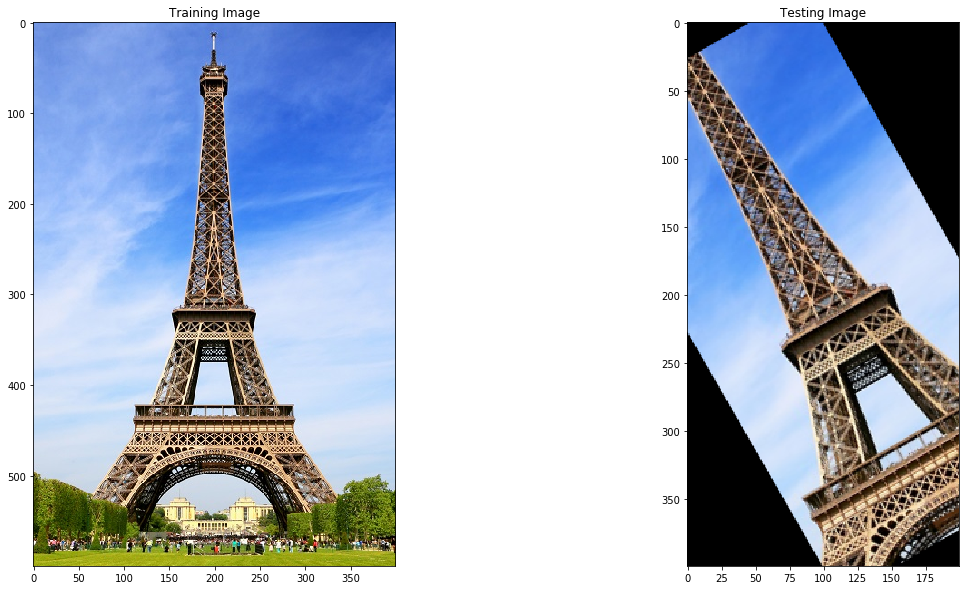

In [2]:
# Affichage des images
fx, plots = plt.subplots(1, 2, figsize=(20,10))

plots[0].set_title("Training Image")
plots[0].imshow(training_image)

plots[1].set_title("Testing Image")
plots[1].imshow(test_image);

## DÉTECTION DES POINTS CLÉS ET CRÉATION DES DESCRIPTEURS

Nombre de points clés detectés dans l'image d'entrainement:  1186
Nombre de points clés detectés dans l'image test:  698


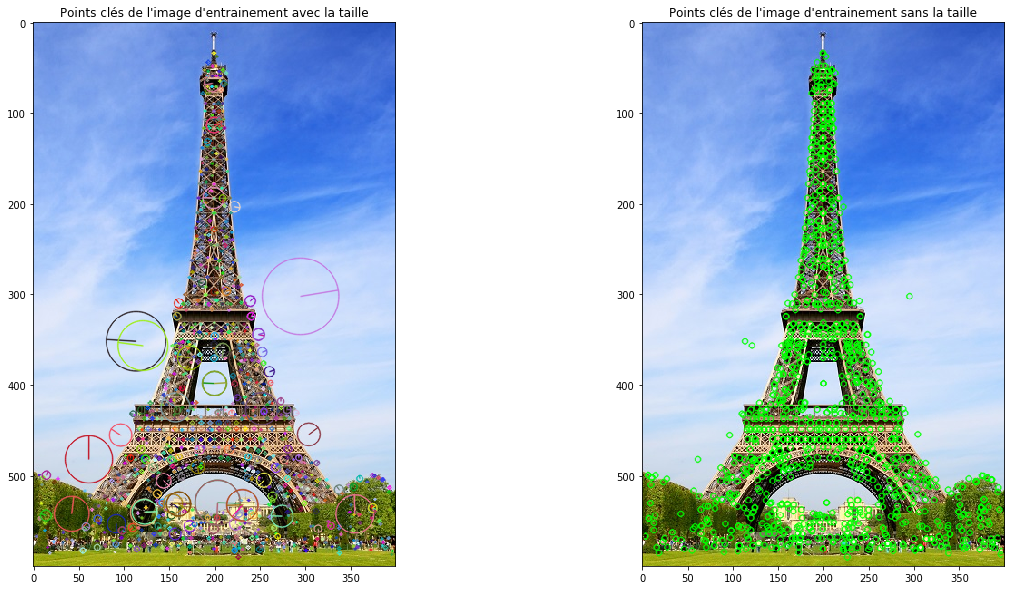

In [3]:
sift = cv2.xfeatures2d.SIFT_create()

train_keypoints, train_descriptor = sift.detectAndCompute(training_gray, None)
test_keypoints, test_descriptor = sift.detectAndCompute(test_gray, None)

keypoints_without_size = np.copy(training_image)
keypoints_with_size = np.copy(training_image)

cv2.drawKeypoints(training_image, train_keypoints, keypoints_without_size, color = (0, 255, 0))

cv2.drawKeypoints(training_image, train_keypoints, keypoints_with_size, flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Affichage de l'images
fx, plots = plt.subplots(1, 2, figsize=(20,10))

plots[0].set_title("Points clés de l'image d'entrainement avec la taille")
plots[0].imshow(keypoints_with_size, cmap='gray')

plots[1].set_title("Points clés de l'image d'entrainement sans la taille")
plots[1].imshow(keypoints_without_size, cmap='gray')

# Print the number of keypoints detected in the training image
print("Nombre de points clés detectés dans l'image d'entrainement: ", len(train_keypoints))

# Print the number of keypoints detected in the query image
print("Nombre de points clés detectés dans l'image test: ", len(test_keypoints))

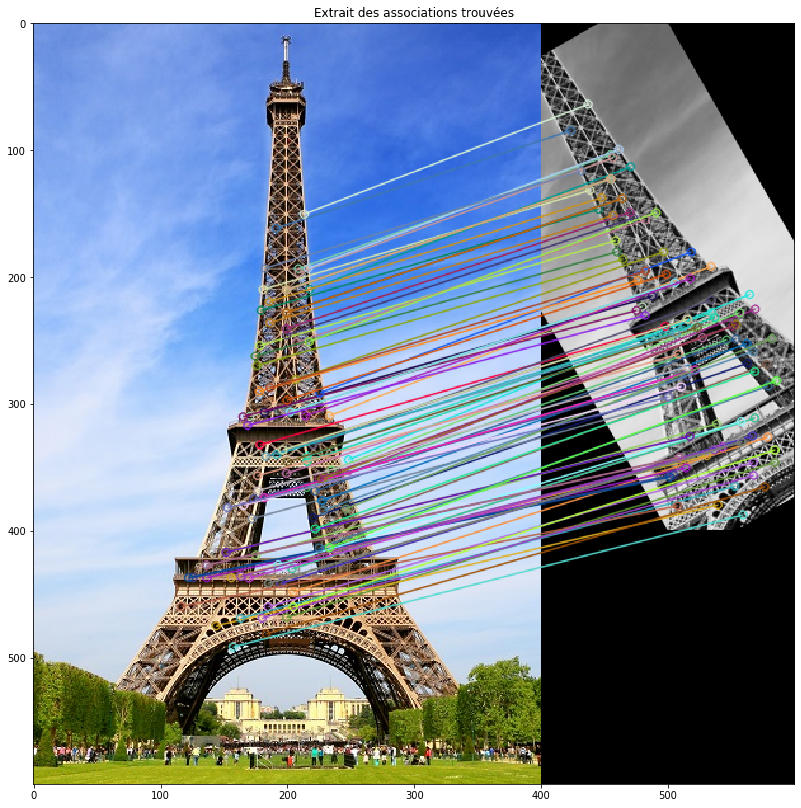


Nombre d'associations de points clés entre l'image d'entrainement et l'image question:  512


In [5]:
# ## Association de points clés

# Créer un objet Brute Force Matcher
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck = True)

matches = bf.match(train_descriptor, test_descriptor)

# on prend les associations avec la distance la plus courte
matches = sorted(matches, key = lambda x : x.distance)

#pour plus de lisibilité, on ne prend que quelques points clés
result = cv2.drawMatches(training_image, train_keypoints, test_gray, test_keypoints, matches[0:100], test_gray, flags = 2)


plt.rcParams['figure.figsize'] = [20.0, 14.0]
plt.title('Extrait des associations trouvées')
plt.imshow(result)
plt.show()

print("\nNombre d'associations de points clés entre l'image d'entrainement et l'image question: ", len(matches))